# 15.3 stock_load: 간단한 데이터 리더

In [4]:
import pandas_datareader.data as web

def load_stock(ticker_str):
    '''주식 적재 함수.
    인수로 주어진 문자열 ticker_str의 정보를 적재한다.
    'MSFT'와 같이 정해진 주식 정보를 pandas 데이터 프레임에 넣고 반환한다.
    
    '''
    df = web.DataReader(ticker_str, 'yahoo')
    df = df.reset_index()
    return df

# 데이터 프레임(stock_df)을 가져와서 출력한다.
if __name__ == '__main__':
    stock_df = load_stock('MSFT')   # 'msft'도 괜찮다.
    print(stock_df)
    print(stock_df.columns)

           Date        High         Low        Open       Close      Volume  \
0    2017-11-15   83.690002   82.690002   83.470001   82.980003  19383100.0   
1    2017-11-16   83.419998   82.940002   83.099998   83.199997  20962800.0   
2    2017-11-17   83.120003   82.239998   83.120003   82.400002  22079000.0   
3    2017-11-20   82.589996   82.250000   82.400002   82.529999  16315000.0   
4    2017-11-21   83.839996   82.739998   82.739998   83.720001  21237500.0   
...         ...         ...         ...         ...         ...         ...   
1253 2022-11-08  231.649994  225.839996  228.699997  228.869995  28192500.0   
1254 2022-11-09  228.630005  224.330002  227.369995  224.509995  27852900.0   
1255 2022-11-10  243.330002  235.000000  235.429993  242.979996  46268000.0   
1256 2022-11-11  247.990005  241.929993  242.990005  247.110001  34600900.0   
1257 2022-11-14  243.910004  239.210007  241.985001  241.550003  30966872.0   

       Adj Close  
0      78.363731  
1      78.571

# 15.4 간단한 주식 차트 만들기

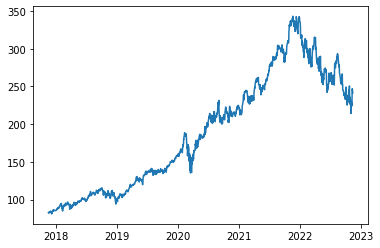

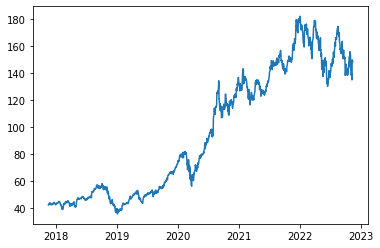

In [6]:
'''
2개의 지정 주식에 대한 종장 시세로 최소 그래프를 그린다.
file stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_plot(stock_df):
    '''플롯을 수행하는 함수
    stock_df를 사용하여 웹에서 주식 데이터 프레임을 읽어온다.
    '''
    column = stock_df.Close                    # 시세 추출
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column)            # 플룻 수행
    plt.show()                                 # 그래프 출력
    
# 2개의 테스트 케이스 수행
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df)
    stock_df = load_stock('AAPL')
    do_plot(stock_df)

# 15.5 제목과 범례 추가하기

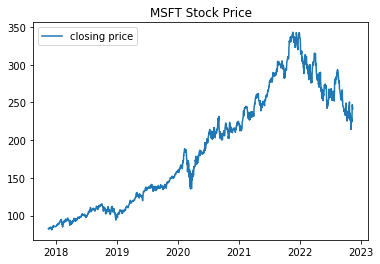

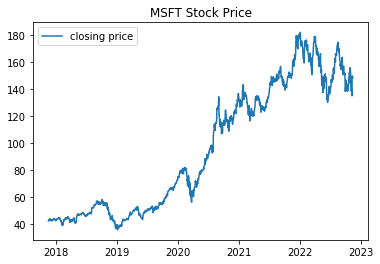

In [7]:
'''
2개의 지정 주식에 대한 종장 시세로 최소 그래프를 그린다.
file stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock

def do_plot(stock_df):
    '''플롯을 수행하는 함수
    stock_df를 사용하여 웹에서 주식 데이터 프레임을 읽어온다.
    '''
    column = stock_df.Close                    # 시세 추출
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label = 'closing price')            # 플룻 수행
    plt.legend()
    plt.title('MSFT Stock Price')
    plt.show()                                 # 그래프 출력
    
# 2개의 테스트 케이스 수행
if __name__ == '__main__':
    stock_df = load_stock('MSFT')
    do_plot(stock_df)
    stock_df = load_stock('AAPL')
    do_plot(stock_df)

# 15.6 makeplot 함수 작성하기(리팩터링)

In [8]:
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()
    
def do_plot(stock_df, name_str):
    makeplot(stock_df, 'Close', 'closing price')
    plt.title(name_str + ' Stock Price')
    plt.show()

# 15.7 2개의 주식 시세를 함께 그래프로 그리기

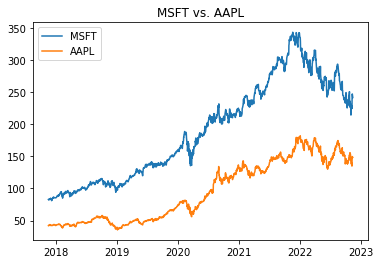

In [10]:
def do_duo_plot(stock1_df, stock2_df):
    '''개정된 do_plot 함수
    이번에는 2개의 주식 데이터 프레임을 처리한다.
    모두 함께 그래프로 표현한다.
    '''
    makeplot(stock1_df, 'Close', 'MSFT')
    makeplot(stock2_df, 'Close', 'AAPL')
    plt.title('MSFT vs. AAPL')
    plt.show()

if __name__ == '__main__':
    stock1_df = load_stock('MSFT')
    stock2_df = load_stock('AAPL')
    do_duo_plot(stock1_df, stock2_df)

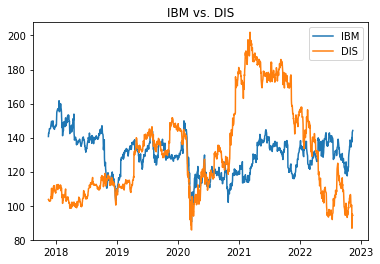

In [12]:
'''
2개의 주식 시세 그래프를 그린다.
stock_load.py에 의존성이 있다.
'''
import numpy as np
import matplotlib.pyplot as plt
from stock_load import load_stock


def do_duo_plot(stock1_df, stock2_df, name1, name2):
    '''두 주식의 그래프를 그린다.
    인수는 데이터 프레임과
    열의 이름으로 사용할 주식 시세 기호 문자열이다.
    '''
    makeplot(stock1_df, 'Close', name1)
    makeplot(stock2_df, 'Close', name2)
    plt.title(name1 + ' vs. ' + name2)
    plt.show()


# 플롯을 만든다: 지루하고 반복적인 작업을 수행한다.
def makeplot(stock_df, field, my_str):
    column = getattr(stock_df, field)
    column = np.array(column, dtype='float')
    plt.plot(stock_df.Date, column, label=my_str)
    plt.legend()

# 메인 모듈이면 테스트를 수행한다.
if __name__ == '__main__':
    stock1_df = load_stock('IBM')
    stock2_df = load_stock('DIS')
    do_duo_plot(stock1_df, stock2_df, 'IBM', 'DIS')